In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_df = pd.read_csv('/content/drive/My Drive/Machine-Learning/fake-reviews/fake_reviews_dataset.csv')
raw_df

,category,rating,text,label
0,Home_and_Kitchen,5.0,"Love this! Well made, sturdy, and very comfor...",1
1,Home_and_Kitchen,5.0,"love it, a great upgrade from the original. I...",1
2,Home_and_Kitchen,5.0,This pillow saved my back. I love the look and...,1
3,Home_and_Kitchen,1.0,"Missing information on how to use it, but it i...",1
4,Home_and_Kitchen,5.0,Very nice set. Good quality. We have had the s...,1
...,...,...,...,...
40521,Beauty,4.0,The shampoo has a pleasant scent and cleans we...,1
40522,Clothing,3.0,The jacket is stylish but not very warm. As pe...,1
40523,Sporting Goods,5.0,The running shoes provide excellent support. A...,1
40524,Food,4.0,The pasta cooks perfectly every time. Accordin...,1


In [ ]:
raw_df.label.value_counts()

,count
label,
1,20294
0,20232


## Data Cleaning

In [ ]:
raw_df.drop(columns=['category','rating'], inplace=True)
raw_df

,text,label
0,"Love this! Well made, sturdy, and very comfor...",1
1,"love it, a great upgrade from the original. I...",1
2,This pillow saved my back. I love the look and...,1
3,"Missing information on how to use it, but it i...",1
4,Very nice set. Good quality. We have had the s...,1
...,...,...
40521,The shampoo has a pleasant scent and cleans we...,1
40522,The jacket is stylish but not very warm. As pe...,1
40523,The running shoes provide excellent support. A...,1
40524,The pasta cooks perfectly every time. Accordin...,1


## EDA

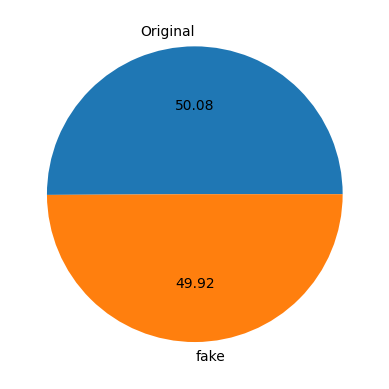

In [ ]:
plt.pie(raw_df['label'].value_counts(), labels=['Original', 'fake'],autopct="%0.2f")
plt.show()

## Data Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:


raw_df['num_characters'] = raw_df['text'].apply(len)
raw_df['num_words'] = raw_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
raw_df['num_sentences'] = raw_df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
sns.pairplot(raw_df,hue='label')

In [ ]:
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
nltk.download('stopwords')
raw_df['transformed_text'] = raw_df['text'].apply(transform_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
raw_df

,text,label,num_characters,num_words,num_sentences,transformed_text
0,"Love this! Well made, sturdy, and very comfor...",1,75,18,3,love well made sturdi comfort love pretti
1,"love it, a great upgrade from the original. I...",1,80,19,2,love great upgrad origin mine coupl year
2,This pillow saved my back. I love the look and...,1,67,16,2,pillow save back love look feel pillow
3,"Missing information on how to use it, but it i...",1,81,19,2,miss inform use great product price
4,Very nice set. Good quality. We have had the s...,1,85,20,3,nice set good qualiti set two month
...,...,...,...,...,...,...
40521,The shampoo has a pleasant scent and cleans we...,1,98,19,2,shampoo pleasant scent clean well virtual assi...
40522,The jacket is stylish but not very warm. As pe...,1,103,22,2,jacket stylish warm per review suitabl mild wi...
40523,The running shoes provide excellent support. A...,1,100,16,2,run shoe provid excel support autom system hig...
40524,The pasta cooks perfectly every time. Accordin...,1,102,22,2,pasta cook perfectli everi time accord ai revi...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(raw_df['transformed_text']).toarray()
y = raw_df['label'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    return accuracy


## Training and Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
clfs = {
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'xgb':xgb
}
accuracy_scores = []
for name,clf in clfs.items():
    accuracy_scores.append(train_classifier(clf, X_train,y_train,X_test,y_test))

In [ ]:
accuracy_scores

## Hyperparameter Tuning

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.experimental import enable_halving_search_cv  # Needed to enable halving
from sklearn.model_selection import HalvingRandomSearchCV
import numpy as np

lr_param_grid = {
    'logisticregression__C': np.logspace(-2, 2, 5),
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    'logisticregression__penalty': ['l2'],
    'logisticregression__max_iter': [100, 200, 500]
}

sgd_param_grid = {
    'sgdclassifier__alpha': np.logspace(-4, -1, 4),
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdclassifier__max_iter': [1000, 2000],
    'sgdclassifier__loss': ['log_loss', 'hinge']
}

lr_pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42)
)

# SGDClassifier Pipeline
sgd_pipe = make_pipeline(
    StandardScaler(),
    SGDClassifier(random_state=42)
)

lr_search = HalvingRandomSearchCV(
    estimator=lr_pipe,
    param_distributions=lr_param_grid,
    factor=3,
    resource='n_samples',
    max_resources='auto',
    random_state=42,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

sgd_search = HalvingRandomSearchCV(
    estimator=sgd_pipe,
    param_distributions=sgd_param_grid,
    factor=3,
    resource='n_samples',
    max_resources='auto',
    random_state=42,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit models
lr_search.fit(X_train,y_train)
sgd_search.fit(X_train,y_train)

# Print best estimators
print("\n Best LogisticRegression:\n", lr_search.best_estimator_)
print("\n Best SGDClassifier:\n", sgd_search.best_estimator_)


In [ ]:
logreg = LogisticRegression(C=np.float64(1.0), penalty='l2', solver='liblinear', random_state=42)
sgdclf = SGDClassifier(alpha=np.float64(0.1), max_iter=2000,random_state=42)
train_classifier(logreg,X_train,y_train,X_test,y_test), train_classifier(sgdclf,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
import numpy as np

# Random Forest Param Grid
rf_param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# XGBClassifier Param Grid
xgb_param_grid = {
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__max_depth': [3, 6, 10],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.7, 1.0],
    'xgbclassifier__colsample_bytree': [0.7, 1.0]
}

# Random Forest Pipeline
rf_pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

# XGBoost Pipeline
xgb_pipe = make_pipeline(
    StandardScaler(),
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
)

# Halving Random Search for Random Forest
rf_search = HalvingRandomSearchCV(
    estimator=rf_pipe,
    param_distributions=rf_param_grid,
    factor=3,
    resource='n_samples',
    max_resources='auto',
    random_state=42,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Halving Random Search for XGBClassifier
xgb_search = HalvingRandomSearchCV(
    estimator=xgb_pipe,
    param_distributions=xgb_param_grid,
    factor=3,
    resource='n_samples',
    max_resources='auto',
    random_state=42,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit both models
rf_search.fit(X_train,y_train)
xgb_search.fit(X_train,y_train)

# Print Best Estimators
print("\n Best RandomForestClassifier:\n", rf_search.best_estimator_)
print("\n Best XGBClassifier:\n", xgb_search.best_estimator_)


In [ ]:
ranfor = RandomForestClassifier(max_depth=30, min_samples_leaf=2,min_samples_split=10, n_estimators=200,n_jobs=-1, random_state=42)
xgbclf = XGBClassifier(base_score=None, booster=None, callbacks=None,colsample_bylevel=None, colsample_bynode=None,colsample_bytree=0.7, device=None,early_stopping_rounds=None,enable_categorical=False, eval_metric='logloss',feature_types=None, feature_weights=None,gamma=None, grow_policy=None,importance_type=None,interaction_constraints=None, learning_rate=0.1,max_bin=None, max_cat_threshold=None,max_cat_to_onehot=None, max_delta_step=None,max_depth=3, max_leaves=None,min_child_weight=None,monotone_constraints=None, multi_strategy=None,n_estimators=200, n_jobs=None,num_parallel_tree=None,)
train_classifier(ranfor,X_train,y_train,X_test,y_test), train_classifier(xgbclf,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Example pipeline
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
)

# 5-fold CV accuracy
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Fold-wise Accuracies:", scores)
print("Mean Accuracy:", scores.mean())

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf = RandomForestClassifier(
    n_jobs=-1,
    n_estimators=50
)

scores = cross_val_score(
    estimator=clf,
    X=X,
    y=y,
    cv=kf,
    scoring='accuracy'
)

# Output results
print("Fold scores:", scores)
print("Mean accuracy:", scores.mean())


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Use regular KFold instead of StratifiedKFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Classifier
clf = XGBClassifier(
    n_jobs=-1,
    n_estimators=50
)

# Cross-validation using KFold
scores = cross_val_score(
    estimator=clf,
    X=X,
    y=y,
    cv=kf,
    scoring='accuracy'
)

# Output results
print("Fold scores:", scores)
print("Mean accuracy:", scores.mean())


In [ ]:
from sklearn.ensemble import StackingClassifier
estimators=[('RF',  RandomForestClassifier(
    n_jobs=-1,
    n_estimators=50
)), ('XGB', XGBClassifier(
    n_jobs=-1,
    n_estimators=50
))]
final_estimator = RandomForestClassifier(n_estimators=50, random_state=2)
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

## Baseline Modeling

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print("Baseline accuracy:", dummy.score(X_test, y_test))


In [ ]:
# ## BEST MODEL : 84
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('RF',  RandomForestClassifier(
    n_jobs=-1,
    n_estimators=50
)), ('XGB', XGBClassifier(
    n_jobs=-1,
    n_estimators=50
))],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
# Save the entire pipeline

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

with open("/content/drive/My Drive/Machine-Learning/fake-reviews/vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

# with open("/content/drive/My Drive/Machine-Learning/fake-reviews/fake_review_predictor.pkl", "rb") as f:
#     model = pickle.load(f)
model = RandomForestClassifier(
    n_jobs=-1,
    n_estimators=50
).fit(X_train,y_train)

In [ ]:
stop_words = set(stopwords.words('english'))

def transform_text(text: str) -> str:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t.isalnum()]
    tokens = [ps.stem(t) for t in tokens if t not in stop_words and t not in string.punctuation]
    return " ".join(tokens)

In [ ]:
amazon_test_df = pd.read_csv('/content/drive/My Drive/Machine-Learning/fake-reviews/Reviews.csv')


In [ ]:
requests = [
    "Unbelievable product! It’s like a dream come true. I can’t believe I lived without it before.",
    "Works fine for basic use. Not a game changer but good enough for the price.",
    "Horrible quality. The item stopped working within two days and customer support was useless.",
    "My productivity has doubled since I started using this. Truly a miracle tool for professionals!",
    "Received the wrong item. Very disappointed, had to initiate a return right away.",
    "A total life saver! Everyone in my house is obsessed with this gadget now.",
    "It’s okay. Does what it says, but nothing extraordinary. I’ve used better alternatives.",
    "The most advanced product I’ve ever seen. It’s like it’s from the future!",
    "Shipping was fast and product was as described. No complaints so far.",
    "Useless junk. Broke apart during first use. Not worth a single rupee.",
    "Just WOW! This should win product of the year. I’m shocked how perfect it is.",
    "A decent purchase. Nothing amazing, but works for my needs.",
    "Overheats quickly and performance drops. Not suitable for long usage.",
    "I’ve told all my friends about this. I can’t stop talking about how amazing it is.",
    "Pretty average overall. Not bad, but not impressive either.",
    "Sturdy and reliable. Been using it daily and no issues so far.",
    "This is the most flawless invention of the decade. I feel blessed to own it.",
    "Arrived damaged. Support was slow, but eventually helped. Still not happy though.",
    "It’s made my routine so smooth. Absolutely love every bit of it.",
    "Terrible product. Misleading description and horrible customer service.",
    "I feel like a genius using this. It’s like it’s doing all the thinking for me.",
    "Did the job well. Better than I expected at this price.",
    "Cheap material, looks good in photos but feels plastic in hand.",
    "Best purchase I’ve made this year. I can’t stop smiling!",
    "Mediocre build and not worth the hype. Many better options out there.",
    "Feels luxurious and premium. Surprised by the quality.",
    "Too many fake promises. Barely does what it claims.",
    "Amazing innovation! Feels like Elon Musk made it himself.",
    "Works like a charm. I use it almost every day now.",
    "Doesn’t live up to the expectations. Especially weak battery life.",
    "Feels like a scam. Cheap copy of a known brand.",
    "Literally perfect. The attention to detail is jaw-dropping!",
    "Very basic, but okay for short-term use.",
    "I feel smarter just owning this. It’s that good!",
    "Noisy and inefficient. Definitely wouldn’t recommend it.",
    "Solid performance. Did everything I needed it to do.",
    "This is the greatest product I’ve ever seen in my life.",
    "Returns are a hassle. Took too long to get my refund.",
    "Totally changed the way I work. A real productivity booster!",
    "Not good. Stopped charging after 3 uses.",
    "Every family should have this. It’s a total blessing.",
    "Nothing exceptional. It's just another average product.",
    "Delivered quickly and setup was easy. Using it regularly.",
    "Fake-feeling interface. Looks premium but acts cheap.",
    "Absolute perfection. I couldn’t design something better myself.",
    "Decent quality for the money. Matches the description well.",
    "Feels like magic. I keep wondering how it even works!",
    "Looks cool, but lacks performance.",
    "Exceptional value for money. Would buy again.",
    "It's a must-have! Everyone should get this immediately.",
    "Fine for casual use, but not professional-grade."
]


new_df  = pd.DataFrame(columns=['text','prediction'])
for request in requests:
  transformed = transform_text(request)
  vectorized = vectorizer.transform([transformed])
  prediction = model.predict(vectorized)
  new_entry = {'text': request, 'prediction': prediction[0]}
  new_df = pd.concat([new_df, pd.DataFrame([new_entry])], ignore_index=True)


In [ ]:
new_df.prediction.value_counts()

,count
prediction,
0,38
1,13


In [ ]:
request = """There are certain things in this shoe that are very comfortable but they are also very uncomfortable.  The bottom of the shoe is very flexible and the sole is very tight.  I would definitely recommend this shoe to anyone.  I wear a size 9.5 and it fits perfectly.  I have a wide foot and the 9.5 fit me perfectly.  I wish I could have ordered a size 9.5 or 9.5.  I have a size 9.5 in shoes and this is perfect.  The heel is really nice and comfortable.  I just wish I could have ordered a size 10 or 10.5.  I can't say enough good things about this shoe.  I got a huge "thank you" for the purchase. I am very happy with the purchase and am happy with the quality of the shoe.I bought this in a small and it was too big. I was afraid I would have to return it, but I really liked the fit of the material and the fabric. I was very pleased with this purchase.I wear these shoes all the time. They are very comfortable and the sole is very comfortable. The color is wonderful and the fit is great. I would recommend these shoes.I ordered this for my daughter.  She is a small girl and it fit perfect.  The length is perfect and the color is beautiful.  She loves it and wears it everyday.Very comfortable. I am a 36D and it fits perfectly. I am 5'2" and 135 lbs. It's my second pair. I love the color and the fit. She loves the color.The material is nice but the fabric is thin."""
transformed = transform_text(request)
vectorized = vectorizer.transform([transformed])
prediction = model.predict(vectorized)
print(prediction)

[1]


In [ ]:
with open("fake_review_predictor.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


,Text
381949,We love Tete de Moine cheese. The best way to...
259956,This water drink is the best! I love the refr...
77268,"Hey, it's dog food but it's really healthy and..."
65913,I find these a little stinkier than most treat...
18575,I love giving and receiving these Lindor Truff...
312088,"Love these pretzels, I actuallly think they ha..."
45718,"Nice, gingery bite kind of like you get with s..."
25312,I bought this tuna when it was on sale to try ...
78461,I fell in love with the lemon flavor immediate...
245066,I am sorry to say this is not a product I woul...


In [ ]:
demo_df = raw_df.text.sample(100, random_state=32)

try:
    demo_df.to_json('demo_reviews.json', orient='records', indent=4)
    print("CSV successfully converted to JSON at: demo_reviews.json")
except Exception as e:
    print(f"Error converting CSV to JSON: {e}")

✅ CSV successfully converted to JSON at: demo_reviews.json


In [ ]:
raw_df.describe()

,label,num_characters,num_words,num_sentences
count,40526.000000,40526.000000,40526.000000,40526.000000
mean,0.500765,350.642082,76.531141,5.267359
std,0.500006,369.616159,79.191731,4.911848
min,0.000000,24.000000,2.000000,1.000000
25%,0.000000,106.000000,23.000000,2.000000
50%,1.000000,198.000000,44.000000,3.000000
75%,1.000000,438.000000,96.000000,6.000000
max,1.000000,2827.000000,510.000000,133.000000
